## Mitesh Kumar Chaudhary

### Clustering - Iris Data - K- Means Clustering

### Import Libraries

In [195]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')

### Import Data

In [11]:
iris = datasets.load_iris()

In [14]:
iris_data = pd.DataFrame(data=iris.data,columns=iris.feature_names)

In [120]:
iris_data_target = iris.target

In [16]:
iris_data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


### Data Understanding

In [188]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [190]:
print("No. of rowa : {}\nNo of columns : {}" .format(iris_data.shape[0],iris_data.shape[1]))

No. of rowa : 150
No of columns : 5


In [191]:
iris_data.dtypes

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
Target                 int32
dtype: object

In [192]:
iris_data.isna().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
Target               0
dtype: int64

<AxesSubplot:xlabel='Target', ylabel='count'>

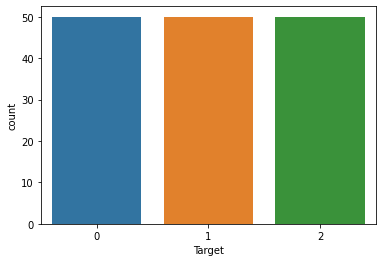

In [193]:
sns.countplot(x=iris_data.Target)

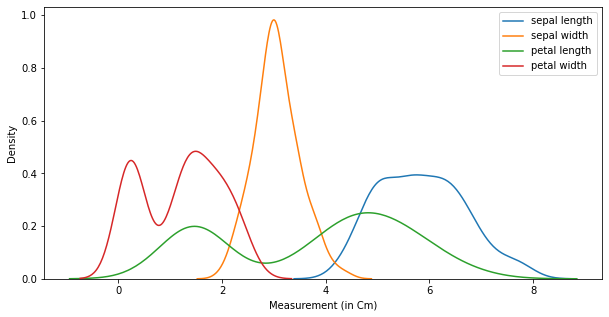

In [257]:
fig, ax = plt.subplots(1,1,figsize=(10,5),)
sns.distplot(a=iris_data["sepal length (cm)"],hist=False,label='sepal length')
sns.distplot(a=iris_data["sepal width (cm)"],hist=False,label='sepal width')
sns.distplot(a=iris_data["petal length (cm)"],hist=False,label='petal length')
sns.distplot(a=iris_data["petal width (cm)"],hist=False,label='petal width')
ax.set_xlabel("Measurement (in Cm)")
plt.legend()
plt.show()


### Model Building

In [239]:
X = iris_data.drop(labels="Target",axis=1)

In [241]:
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### Model Training

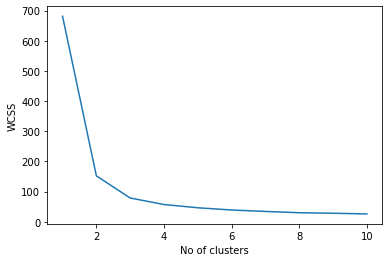

In [262]:
WCSS = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    WCSS.append(kmeans.inertia_)
    

plt.plot(range(1, 11), WCSS)
plt.xlabel('No of clusters')
plt.ylabel('WCSS')
plt.show()

#### No. of optimum Cluster : 3

In [242]:
kmean_cluster = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)

### Model Testing

In [245]:
y_pred = kmean_cluster.fit_predict(X)

In [246]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [247]:
kmean_cluster.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

### Model Evaluation

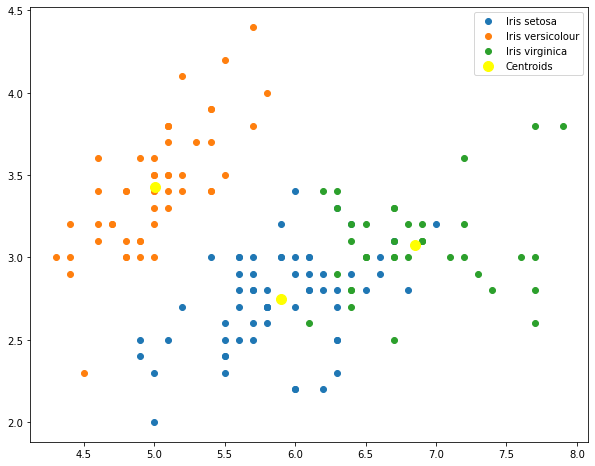

In [258]:
plt.figure(figsize=(10,8))
plt.scatter(x=X[y_pred == 0]["sepal length (cm)"], y=X[y_pred == 0]["sepal width (cm)"],label = 'Iris setosa')
plt.scatter(X[y_pred == 1]["sepal length (cm)"], X[y_pred == 1]["sepal width (cm)"],label = 'Iris versicolour')
plt.scatter(X[y_pred == 2]["sepal length (cm)"], X[y_pred == 2]["sepal width (cm)"],label = 'Iris virginica')
plt.scatter(kmean_cluster.cluster_centers_[:, 0], kmean_cluster.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')
plt.legend()
plt.show()